## Regression outlier effect.


In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

### Creating dataset

In [4]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

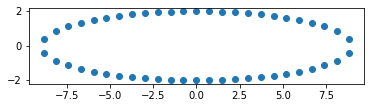

In [5]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [6]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [7]:
data=X.copy()
data1=Y.copy()

In [8]:
X

array([ 0.00000000e+00,  7.44742410e-01,  1.48935470e+00,  2.23369584e+00,
        2.97760060e+00,  3.72086049e+00,  4.46319267e+00,  5.20418351e+00,
        5.94317435e+00,  6.67899598e+00,  7.40922283e+00,  8.12729576e+00,
        8.80003723e+00,  8.80003723e+00,  8.12729576e+00,  7.40922283e+00,
        6.67899598e+00,  5.94317435e+00,  5.20418351e+00,  4.46319267e+00,
        3.72086049e+00,  2.97760060e+00,  2.23369584e+00,  1.48935470e+00,
        7.44742410e-01,  1.10218212e-15, -7.44742410e-01, -1.48935470e+00,
       -2.23369584e+00, -2.97760060e+00, -3.72086049e+00, -4.46319267e+00,
       -5.20418351e+00, -5.94317435e+00, -6.67899598e+00, -7.40922283e+00,
       -8.12729576e+00, -8.80003723e+00, -8.80003723e+00, -8.12729576e+00,
       -7.40922283e+00, -6.67899598e+00, -5.94317435e+00, -5.20418351e+00,
       -4.46319267e+00, -3.72086049e+00, -2.97760060e+00, -2.23369584e+00,
       -1.48935470e+00, -7.44742410e-01])

In [9]:
Y

array([ 2.        ,  1.99314081,  1.972425  ,  1.93742355,  1.88737056,
        1.82107277,  1.73674751,  1.63172973,  1.50191119,  1.34055475,
        1.13536674,  0.85914295,  0.41924946, -0.41924946, -0.85914295,
       -1.13536674, -1.34055475, -1.50191119, -1.63172973, -1.73674751,
       -1.82107277, -1.88737056, -1.93742355, -1.972425  , -1.99314081,
       -2.        , -1.99314081, -1.972425  , -1.93742355, -1.88737056,
       -1.82107277, -1.73674751, -1.63172973, -1.50191119, -1.34055475,
       -1.13536674, -0.85914295, -0.41924946,  0.41924946,  0.85914295,
        1.13536674,  1.34055475,  1.50191119,  1.63172973,  1.73674751,
        1.82107277,  1.88737056,  1.93742355,  1.972425  ,  1.99314081])

### Adding outliers to the dataset and visualizing the behaviour of Linear Regression 

<Figure size 1440x1440 with 0 Axes>

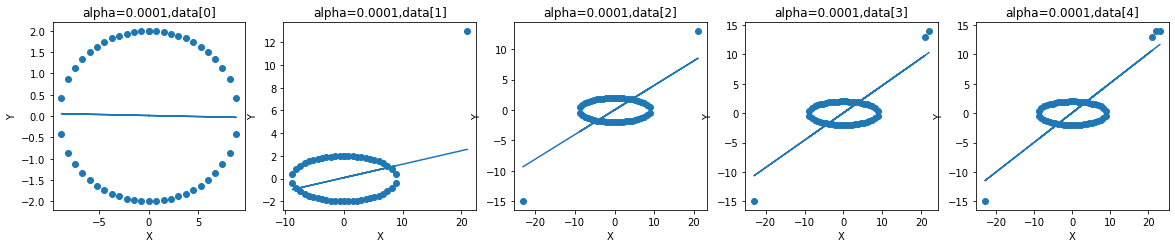

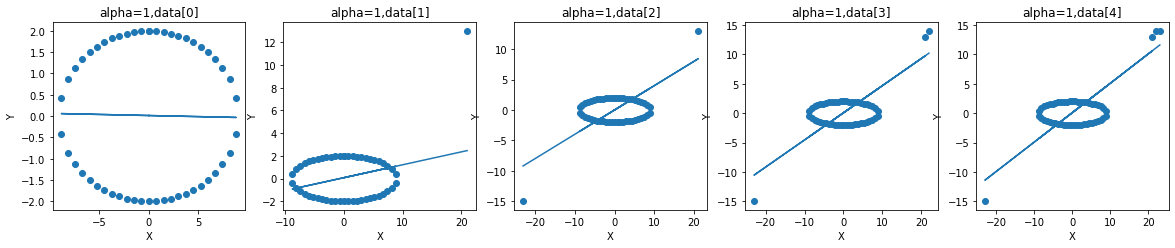

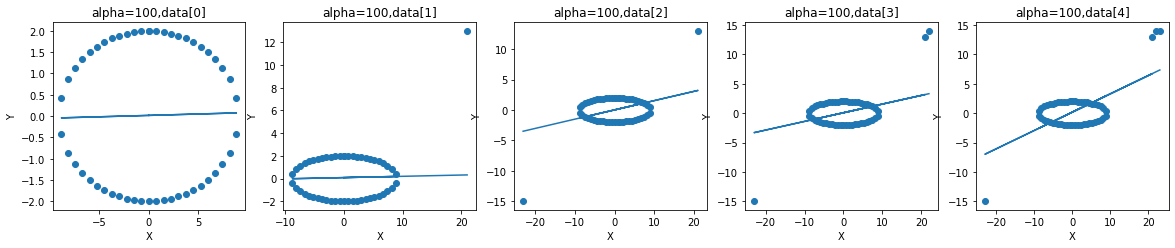

In [11]:
#regulizer
c=[0.0001, 1, 100,1000]
outliers=[(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
plt.figure(figsize=(20,20))
for b in range(3): 
    c1=c[b]
    plt.figure(figsize=(20,20))
    X=data.copy()
    Y=data1.copy()
    count=-1
    for i,j in outliers:
        count+=1
        plt.subplot(5, 5, count+1)
        X=np.append(X,[i])
        Y=np.append(Y,[j])
        model = SGDRegressor(alpha=c1,eta0=0.001, learning_rate='constant',random_state=0).fit(X.reshape(-1,1),Y)
        plt.scatter(X,Y)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.plot(X,model.predict(X.reshape(-1,1)))
        plt.title(f'alpha={c1},data[{count}]')
    plt.show()

**OBSERVATION**

as alpha increases overfitting decreases . so to decrease outlier effect in the model ,we should increase alpha value .
